In [43]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import xgboost as xgb
from sklearn.cluster import DBSCAN
from sklearn import model_selection
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('DSCapstoneKaggleTrain.csv')
target = data['class']
features = data.drop('class', axis=1)
X = preprocessing.StandardScaler().fit_transform(X=features)
y = target.values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
unsupervised = DBSCAN(eps=.8, metric='cityblock', min_samples=25)
clusters = unsupervised.fit(np.array(target).reshape(-1, 1))

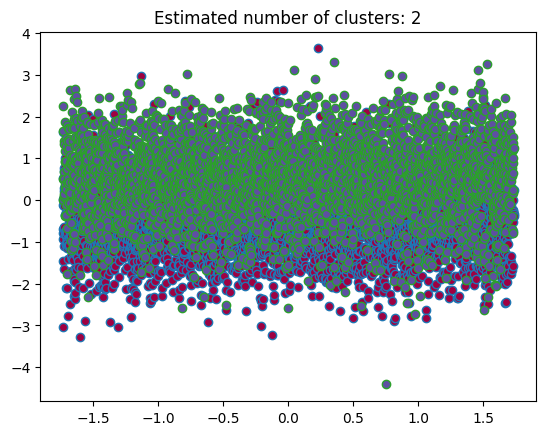

In [47]:
core_samples_mask = np.zeros_like(clusters.labels_, dtype=bool)
core_samples_mask[clusters.core_sample_indices_] = True
labels = clusters.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels = clusters.labels_

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        # markeredgecolor="r",
        markersize=6,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        # markeredgecolor="y",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()